# QUESTION 4

Use Naive bayes, K-nearest, and Decision tree classification algorithms to build classifiers on any two datasets. Pre-process the datasets using techniques specified in Q2. Compare the Accuracy, Precision, Recall and F1 measure reported for each dataset using the above mentioned classifiers under the following situations:

1.   Using Holdout method (Random sampling):


*   Training set = 80% Test set = 20%
*   Training set = 66.6% (2/3rd of total), Test set = 33.3%


2.   Using Cross-Validation:


*   10-fold
*   5-fold


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Hold-out method (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
prediction_nb = gnb.fit(X_train, y_train).predict(X_test)

print("Naive Bayes Predictions:", prediction_nb)
print("Accuracy on the Test Data:")
print(accuracy_score(y_test, prediction_nb))
print("Classification Report:")
print(classification_report(y_test, prediction_nb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_nb))

Naive Bayes Predictions: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]
Accuracy on the Test Data:
0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


# K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)

print("KNN Predictions:", prediction_knn)
print("Accuracy on the Test Data (KNN):")
print(accuracy_score(y_test, prediction_knn))
print("Classification Report (KNN):")
print(classification_report(y_test, prediction_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_knn))

KNN Predictions: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
Accuracy on the Test Data (KNN):
1.0
Classification Report (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


# Decision Tree Classifier

Decision Tree Predictions: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]
Accuracy on the Test Data (Decision Tree):
0.9666666666666667
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]



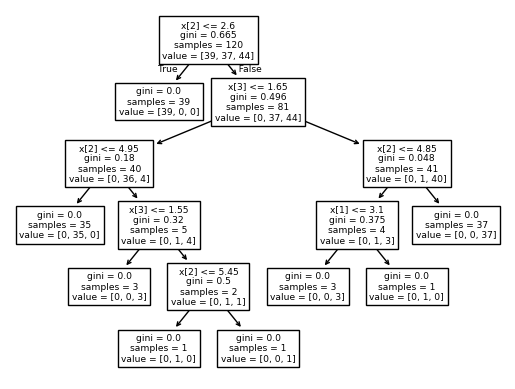

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
deci_tree = DecisionTreeClassifier()
deci_tree.fit(X_train, y_train)
prediction_deci = deci_tree.predict(X_test)

print("Decision Tree Predictions:", prediction_deci)
print("Accuracy on the Test Data (Decision Tree):")
print(accuracy_score(y_test, prediction_deci))
print("Classification Report (Decision Tree):")
print(classification_report(y_test, prediction_deci))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_deci))
print()
tree.plot_tree(deci_tree);

# Comparisons

In [ ]:
acc_nb = accuracy_score(y_test, prediction_nb)
acc_knn = accuracy_score(y_test, prediction_knn)
acc_dt = accuracy_score(y_test, prediction_deci)

report_nb = classification_report(y_test,
                                  prediction_nb,
                                  output_dict=True)
report_knn = classification_report(y_test,
                                   prediction_knn,
                                   output_dict=True)
report_dt = classification_report(y_test,
                                  prediction_deci,
                                  output_dict=True)

# Convert reports to DataFrames
df_nb = pd.DataFrame(report_nb).transpose()
df_knn = pd.DataFrame(report_knn).transpose()
df_dt = pd.DataFrame(report_dt).transpose()

# Select metrics and rename columns
nb_metrics = df_nb[['precision', 'recall', 'f1-score']].rename(columns=
                                                               lambda x:
                                                               f"NB_{x}")
knn_metrics = df_knn[['precision', 'recall', 'f1-score']].rename(columns=
                                                                 lambda x:
                                                                 f"KNN_{x}")
dt_metrics = df_dt[['precision', 'recall', 'f1-score']].rename(columns=
                                                               lambda x:
                                                               f"DT_{x}")

comparison_df = nb_metrics.join(knn_metrics).join(dt_metrics)
comparison_df.loc['accuracy'] = [
    acc_nb, acc_nb, acc_nb,
    acc_knn, acc_knn, acc_knn,
    acc_dt, acc_dt, acc_dt
]

print(comparison_df.round(2).to_string(line_width=10000))

              NB_precision  NB_recall  NB_f1-score  KNN_precision  KNN_recall  KNN_f1-score  DT_precision  DT_recall  DT_f1-score
0                     1.00       1.00         1.00            1.0         1.0           1.0          1.00       1.00         1.00
1                     1.00       0.92         0.96            1.0         1.0           1.0          1.00       0.92         0.96
2                     0.86       1.00         0.92            1.0         1.0           1.0          0.86       1.00         0.92
accuracy              0.97       0.97         0.97            1.0         1.0           1.0          0.97       0.97         0.97
macro avg             0.95       0.97         0.96            1.0         1.0           1.0          0.95       0.97         0.96
weighted avg          0.97       0.97         0.97            1.0         1.0           1.0          0.97       0.97         0.97


Naive Bayes Predictions: [0 1 1 0 2 2 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1]
Accuracy on the Test Data (Naive Bayes):
0.94
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.89      0.92        19
           2       0.87      0.93      0.90        14

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50


KNN Predictions: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1]
Accuracy on the Test Data (KNN):
0.98
Classification Report (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.96        14

  

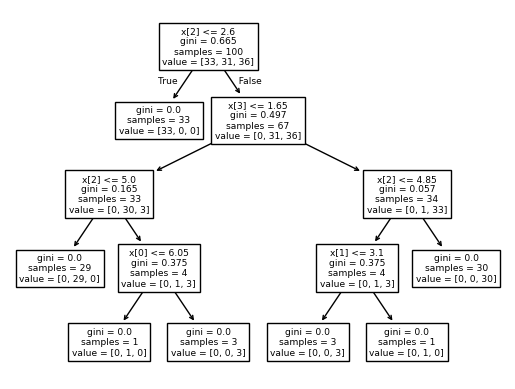

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Hold-out method (66.6% train, 33.3% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/3,
                                                    random_state=1)

# Naive Bayes Classifier
gnb = GaussianNB()
prediction_nb = gnb.fit(X_train, y_train).predict(X_test)
print("Naive Bayes Predictions:", prediction_nb)
print("Accuracy on the Test Data (Naive Bayes):")
print(accuracy_score(y_test, prediction_nb))
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, prediction_nb))
print()

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
print("KNN Predictions:", prediction_knn)
print("Accuracy on the Test Data (KNN):")
print(accuracy_score(y_test, prediction_knn))
print("Classification Report (KNN):")
print(classification_report(y_test, prediction_knn))
print()

# Decision Tree Classifier
deci_tree = DecisionTreeClassifier()
deci_tree.fit(X_train, y_train)
prediction_deci = deci_tree.predict(X_test)
print("Decision Tree Predictions:", prediction_deci)
print("Accuracy on the Test Data (Decision Tree):")
print(accuracy_score(y_test, prediction_deci))
print("Classification Report (Decision Tree):")
print(classification_report(y_test, prediction_deci))
print()
tree.plot_tree(deci_tree);

# Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Set up 10-fold cross-validation
kf = KFold(n_splits=10)

# Lists to store results
accuracies_nb = []
accuracies_knn = []
accuracies_dt = []

# Perform cross-validation
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    # Naive Bayes
    gnb = GaussianNB()
    prediction_nb = gnb.fit(X_train, y_train).predict(X_test)
    accuracies_nb.append(accuracy_score(y_test, prediction_nb))

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    prediction_knn = knn.predict(X_test)
    accuracies_knn.append(accuracy_score(y_test, prediction_knn))

    # Decision Tree
    deci_tree = DecisionTreeClassifier()
    deci_tree.fit(X_train, y_train)
    prediction_deci = deci_tree.predict(X_test)
    accuracies_dt.append(accuracy_score(y_test, prediction_deci))

# Print average accuracy for each classifier across all folds
print("Average Accuracy for Naive Bayes:", np.mean(accuracies_nb))
print("Average Accuracy for KNN:", np.mean(accuracies_knn))
print("Average Accuracy for Decision Tree:", np.mean(accuracies_dt))

Average Accuracy for Naive Bayes: 0.9466666666666667
Average Accuracy for KNN: 0.9333333333333333
Average Accuracy for Decision Tree: 0.9266666666666665


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Set up 5-fold cross-validation
kf = KFold(n_splits=5)

# Lists to store results
accuracies_nb = []
accuracies_knn = []
accuracies_dt = []

# Perform cross-validation
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    # Naive Bayes
    gnb = GaussianNB()
    prediction_nb = gnb.fit(X_train, y_train).predict(X_test)
    accuracies_nb.append(accuracy_score(y_test, prediction_nb))

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    prediction_knn = knn.predict(X_test)
    accuracies_knn.append(accuracy_score(y_test, prediction_knn))

    # Decision Tree
    deci_tree = DecisionTreeClassifier()
    deci_tree.fit(X_train, y_train)
    prediction_deci = deci_tree.predict(X_test)
    accuracies_dt.append(accuracy_score(y_test, prediction_deci))

# Print average accuracy for each classifier across all folds
print("Average Accuracy for Naive Bayes:", np.mean(accuracies_nb))
print("Average Accuracy for KNN:", np.mean(accuracies_knn))
print("Average Accuracy for Decision Tree:", np.mean(accuracies_dt))

Average Accuracy for Naive Bayes: 0.9466666666666667
Average Accuracy for KNN: 0.9133333333333333
Average Accuracy for Decision Tree: 0.9199999999999999
